In [50]:
import pandas as pd
import numpy as np

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, plot_confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import seaborn as sns


from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec



from utils.utils import *

In [51]:
# load the whole embedding into memory
# w2v_embeddings_index={}
# TOTAL_EMBEDDING_DIM=100
# embeddings_file='full_grams_cbow_100_wiki.mdl'
# w2v_model =KeyedVectors.load(embeddings_file)
# for word in w2v_model.wv.vocab:
#     w2v_embeddings_index[word] = w2v_model[word]
    
# print('Loaded %s word vectors.'% len(w2v_embeddings_index))

# Reading Data

In [52]:
data = pd.read_csv('concat4.csv')
data.head()

,dialect,txt
0,IQ,يسلملي مرورك وروحك الحلوه مبين كلامه خليجي يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالارهاب بالنهايه ينتفض يغير
1,IQ,خلص والله لعيونكم ماعندي شيء معه بالعكس متابعيني بعتز فيهم خلص صافيه لبن مطلبي يقدم استقالته وفوگاها اعتذار ياخي الارهابي عراقي سعودي فلسطيني وين المشكله باب الفرضخليجي وماعنده رحمه وين المساس ب...
2,IQ,شاء اخوه يجمعنه العراق بكل جحيمه حلو والله الموضوع جدا حساس ويحير اتفق معك بس لاتروح زايد عادي اولا اني ردت رجل جنوبي واللي ذكر حجابها ثانيا شدعوه صايره محامي لكوهين صحيح مقوله العراق بلد الغرا...
3,IQ,يسعد مساك بنت العم يسلملي مرورك روعات تواصلك يسعد مساك سيد الحرف الحزين هه عدوله گلبه ورم عدنه گلك خل اتونس همه بكل شيء مارضين فهاي السفره اسمها اتونس وبكيفي
4,IQ,عباله يرجع صدام حسين للحكم ياكلون بخيرنه ويهينون موظفينه اتركه فتره ماسال مايستحق اهتمامك ماخذ بشر وحدي


# Preprocessing

In [53]:
data.txt.sample(3,random_state=5)

62701                                                                                                  افندم حضرتك شفتك  اكدب عنيا يعني اه بحرف النون برضو عندنا نقص حلو ده معناه ايه ربنا يسعدك ويفرح قلبك يارب
99074    اهداء الي  عشان تعرف وتفهم ويصحي ضميرك ضمير الاصل اقراء التعليقات دي كويس سامحنا استاذ حقك رقبتنا عربيه بيت فيلا رحله دبي فرنسا حاجات زي دي الكلام دا حرفيا بعيد علي شديد ياخي اكتر حاجه بتزعل انو ب...
72173    طول عمرك محترم كابتن احمد وياريتهم يفهموا  عارف ليه بتفرج الحلقه بتاعتك وتيجي تخلص بحس اني زعلان انها خلصت   مبدع كالعاده وبالتوفيق دايما ابو الاجناش الزملكاويه بيحاربوا الزمالك عشان عارفين انه لم...
Name: txt, dtype: object

In [54]:
data.txt = data.txt.apply(preprocessing)

In [55]:
data.txt.sample(3,random_state=5)

62701                                                                                                  افندم حضرتك شفتك  اكدب عنيا يعني اه بحرف النون برضو عندنا نقص حلو ده معناه ايه ربنا يسعدك ويفرح قلبك يارب
99074    اهداء الي  عشان تعرف وتفهم ويصحي ضميرك ضمير الاصل اقراء التعليقات دي كويس سامحنا استاذ حقك رقبتنا عربيه بيت فيلا رحله دبي فرنسا حاجات زي دي الكلام دا حرفيا بعيد علي شديد ياخي اكتر حاجه بتزعل انو ب...
72173    طول عمرك محترم كابتن احمد وياريتهم يفهموا  عارف ليه بتفرج الحلقه بتاعتك وتيجي تخلص بحس اني زعلان انها خلصت  مبدع كالعاده وبالتوفيق دايما ابو الاجناش الزملكاويه بيحاربوا الزمالك عشان عارفين انه لمس...
Name: txt, dtype: object

# splitting to train_valid_test sets

In [56]:
le = LabelEncoder()
data['dialect'] = le.fit_transform(data['dialect'])
data['dialect']

0         4
1         4
2         4
3         4
4         4
         ..
114545    1
114546    1
114547    1
114548    1
114549    1
Name: dialect, Length: 114550, dtype: int32

In [57]:
data['dialect'].value_counts()

3     14409
11    10936
6     10528
8      9124
12     7767
5      6981
7      6903
13     6708
0      6575
1      6573
10     4779
15     4061
2      4047
4      3875
14     3608
9      2885
17     2481
16     2310
Name: dialect, dtype: int64

# Tokenization

In [58]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(data['txt']))

In [59]:
###### huge number of stop words 
sorted(x_tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True)

[('والله', 24717),
 ('هه', 21294),
 ('شي', 19577),
 ('الي', 14772),
 ('يعني', 13824),
 ('الناس', 13401),
 ('عشان', 13352),
 ('علي', 12770),
 ('مو', 11935),
 ('ده', 10998),
 ('انه', 10330),
 ('يوم', 9868),
 ('شو', 9643),
 ('دي', 9220),
 ('وين', 8586),
 ('ايه', 8497),
 ('احنا', 8458),
 ('ليش', 8456),
 ('الا', 8234),
 ('لازم', 7985),
 ('حد', 7816),
 ('ناس', 7470),
 ('يارب', 7204),
 ('وانا', 7087),
 ('مره', 6941),
 ('زي', 6827),
 ('اني', 6818),
 ('ممكن', 6664),
 ('اليوم', 6614),
 ('حاجه', 6473),
 ('كنت', 6415),
 ('ربي', 6396),
 ('انك', 6202),
 ('عم', 6050),
 ('شاء', 5799),
 ('خير', 5671),
 ('انو', 5657),
 ('مين', 5609),
 ('يكون', 5591),
 ('انتي', 5582),
 ('عندي', 5520),
 ('صح', 5473),
 ('اول', 5287),
 ('هيك', 5189),
 ('وانت', 5156),
 ('كده', 5126),
 ('شنو', 5115),
 ('سنه', 5041),
 ('طيب', 5026),
 ('جدا', 4931),
 ('ليه', 4881),
 ('لان', 4872),
 ('كتير', 4787),
 ('قال', 4753),
 ('ربنا', 4573),
 ('مصر', 4552),
 ('فيك', 4537),
 ('اكيد', 4500),
 ('رح', 4468),
 ('كمان', 4468),
 ('عادي', 4312),
 

In [60]:
sorted(x_tokenizer.word_counts.items(), key=lambda x:x[1])

[('ولاينعتكم', 1),
 ('الفرضخليجي', 1),
 ('بقدسيتك', 1),
 ('بجنسيت', 1),
 ('ورجحت', 1),
 ('جحيمه', 1),
 ('لكوهين', 1),
 ('مارضين', 1),
 ('بخيرنه', 1),
 ('ولاتنصح', 1),
 ('بالمنصور', 1),
 ('سلڤيات', 1),
 ('ميغلط', 1),
 ('خبلتوها', 1),
 ('اتهمبل', 1),
 ('ينقدها', 1),
 ('اتجوزن', 1),
 ('اللواگه', 1),
 ('اخيته', 1),
 ('شيحبون', 1),
 ('ولافن', 1),
 ('ولاثقافه', 1),
 ('ولامطبقين', 1),
 ('للحوزه', 1),
 ('تنسبوا', 1),
 ('اوزنوا', 1),
 ('ياعراقبعدين', 1),
 ('ترفلون', 1),
 ('وناسنه', 1),
 ('وفخرنه', 1),
 ('طالعتنه', 1),
 ('اتلومني', 1),
 ('گرايب', 1),
 ('سولفينه', 1),
 ('النگد', 1),
 ('مامنزله', 1),
 ('ولاشكلي', 1),
 ('لاتسوينه', 1),
 ('شخسران', 1),
 ('الخايبات', 1),
 ('لفزعاته', 1),
 ('ومامقصوده', 1),
 ('لاتشير', 1),
 ('مخضر', 1),
 ('متاخذغير', 1),
 ('انجمد', 1),
 ('والباگله', 1),
 ('اللوگيه', 1),
 ('تتباري', 1),
 ('نقود', 1),
 ('بالجان', 1),
 ('لايوفقچ', 1),
 ('بالظروره', 1),
 ('عاجزان', 1),
 ('ففضل', 1),
 ('ايڤون', 1),
 ('ديزيدون', 1),
 ('مينگصون', 1),
 ('مسوانه', 1),
 ('صدوگ', 1),
 ('گدامك', 

In [61]:
body_count = []
for sent in data['txt']:
    body_count.append(len(sent.split()))

(array([4.4180e+03, 4.6946e+04, 3.6559e+04, 1.6155e+04, 6.2330e+03,
        2.6390e+03, 1.0590e+03, 4.0700e+02, 1.1300e+02, 2.1000e+01]),
 array([  0. ,  17.4,  34.8,  52.2,  69.6,  87. , 104.4, 121.8, 139.2,
        156.6, 174. ]),
 <BarContainer object of 10 artists>)

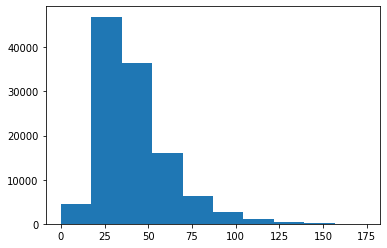

In [62]:
import matplotlib.pyplot as plt

plt.hist(body_count)

In [63]:
#Check how much % of txt have 0-50 words
cnt=0
for i in data['txt']:
    if(len(i.split())<=140):
        cnt=cnt+1
print(cnt/len(data['txt']))

0.9988825840244435


In [64]:
max_text_len=140


In [65]:


text=[]
dialect=[]
for i in range(len(data)):
    if(len(data.txt[i].split())<=max_text_len):
        text.append(data.txt[i])
        dialect.append(data.dialect[i])
        
post_pre=pd.DataFrame({'text':text,'dialect':dialect})

In [66]:
len(data), 10000/len(data)

(114550, 0.08729812309035356)

In [67]:
# get train and test sets
xtrain,xtest,ytrain,ytest=train_test_split(post_pre['text'],post_pre['dialect'],test_size=0.087,random_state=45,shuffle=True, stratify = post_pre['dialect'])

In [68]:
len(xtrain),10000/len(xtrain)

(104467, 0.09572400853858157)

In [69]:
xtrain,xvalid,ytrain,yvalid=train_test_split(xtrain,ytrain,test_size=0.095,random_state=45,shuffle=True,stratify = ytrain)

In [70]:
thresh=8

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 87.06196950144496
Total Coverage of rare words: 14.186926072533213


In [71]:
# max_text_len = 40
#prepare a tokenizer for reviews on training data

x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(xtrain))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(xtrain) 
x_val_seq   =   x_tokenizer.texts_to_sequences(xvalid)
x_test_seq  =   x_tokenizer.texts_to_sequences(xtest)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')
x_test   =   pad_sequences(x_test_seq, maxlen=max_text_len, padding='post')


#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

vocab_size = len(x_tokenizer.word_index)+1

Size of vocabulary in X = 56948


In [72]:
# create a weight matrix for words in training docs
# embedding_matrix = np.zeros((vocab_size, TOTAL_EMBEDDING_DIM))
# for word, i in x_tokenizer.word_index.items():    
#     embedding_vector = w2v_embeddings_index.get(word)
#     if embedding_vector is not None:        
#         embedding_matrix[i] = embedding_vector
# print('Embedding Matrix shape:', embedding_matrix.shape)


In [73]:
# weights= np.load('full_grams_cbow_100_wiki.mdl.wv.vectors.npy')
# weights = weights[:x_voc,:]

In [74]:
print("Size of vocabulary from the w2v model = {}".format(x_voc))

# # K.clear_session()

embedding_dim=100
# # Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
model =  Embedding(vocab_size, embedding_dim,
                    #  weights=[embedding_matrix],
                    #  keras.initializers.Constant(),
                     trainable=True)(encoder_inputs)

model = Bidirectional(LSTM(128,return_sequences=False,return_state=False, dropout=0.4))(model)

# model = LSTM(100,return_sequences=False,return_state=False, dropout=0.4)(model)
# model = Dense(64,activation='relu')(model)
# model = Dense(32,activation='relu')(model)
model = Dense(18,activation='softmax')(model)

model = Model(encoder_inputs, model)
model.summary()

Size of vocabulary from the w2v model = 56948
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 140)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 140, 100)          39299400  
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 18)                4626      
                                                                 
Total params: 39,538,522
Trainable params: 39,538,522
Non-trainable params: 0
_________________________________________________________________


In [75]:
# inp = Input(shape=(max_text_len,))
# embedding_dim=100
# latent_dim = 200
 
# model = Embedding(input_dim=vocab_size,
#                     output_dim=embedding_dim,
#                     trainable=True,
#                     weights=[embedding_matrix]
#                     )(inp)
# model = LSTM(units=latent_dim, return_sequences=True, return_state=False)(model)
# # model = Dropout(0.3)(model)

# model = LSTM(units=latent_dim//2, return_sequences=False, return_state=False)(model)
# model = Dropout(0.3)(model)
    
# model = Flatten()(model)
    
# # model = Dense(64, activation='relu')(model)
# # model = Dropout(0.3)(model)

# model = Dense(18, activation='softmax')(model)
# model = Model(inputs=inp, outputs=model)
# model.summary()


In [76]:
# inp = Input(shape=(max_text_len,))
# embedding_dim=100
# latent_dim = 64
 
# model = Embedding(input_dim=vocab_size,
#                     output_dim=embedding_dim,
#                     trainable=True,
#                     weights=[embedding_matrix]
#                     )(inp)
# model = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(model)
# model = Dropout(0.3)(model)
# model = MaxPooling1D(pool_size=2)(model)
# model = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(model)
# model = MaxPooling1D(pool_size=2)(model)
# model = Flatten()(model)
# model = Dropout(0.3)(model)
# model = Dense(latent_dim, activation='relu')(model)
# model = Dropout(0.3)(model)
# model = Dense(18, activation='softmax')(model)
# model = Model(inputs=inp, outputs=model)
# model.summary()


In [79]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [77]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)
chkpt =ModelCheckpoint('best.h5', monitor="val_accuracy",verbose=0,save_best_only=True)
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy", 
    patience = 10,
    verbose = 1, 
    factor = 0.1, 
    min_lr = 0.00000001,
)


history=model.fit(x_tr, ytrain,epochs=200,callbacks=[es,reduce_lr,chkpt],batch_size=1024, validation_data=(x_val, yvalid))


#### training is done locally  with tf gpu

Epoch 1/200
 2/93 [..............................] - ETA: 10:39 - loss: 2.8858 - accuracy: 0.0815

KeyboardInterrupt: 

In [80]:
from keras.models import load_model 

model = load_model('assets/dlmodel.h5')

In [81]:
preds = model.predict(x_test)
preds = np.argmax(preds,axis=-1)
accuracy_score(ytest, preds)

0.6800602712204922

In [82]:
f1_score(ytest,preds,average='macro')

0.6533225829190422

In [83]:
out= le.inverse_transform(preds)
orig = le.inverse_transform(ytest)

<AxesSubplot:>

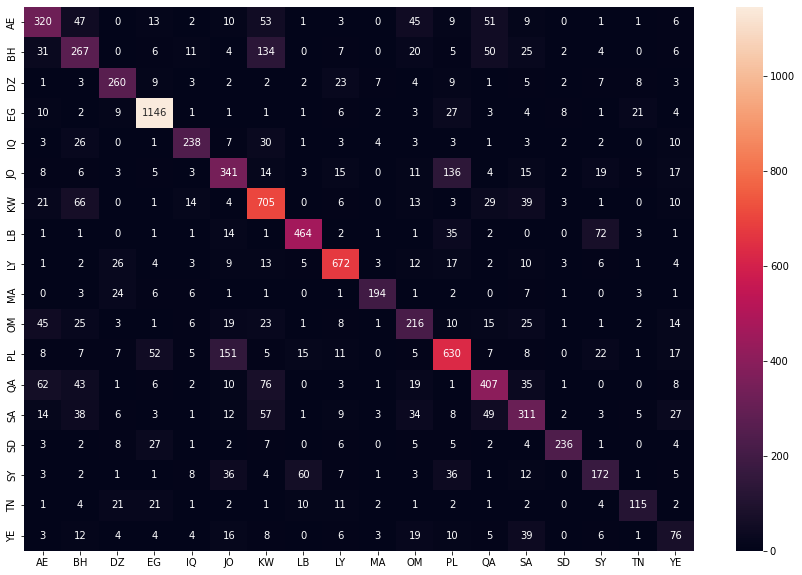

In [84]:

cnf_matrix = confusion_matrix(ytest,preds)
plt.figure(figsize=(15,10))
sns.heatmap(cnf_matrix,xticklabels=le.classes_,annot=True,fmt='g', yticklabels=le.classes_)

In [85]:
print(classification_report(ytest,preds))


              precision    recall  f1-score   support

           0       0.60      0.56      0.58       571
           1       0.48      0.47      0.47       572
           2       0.70      0.74      0.72       351
           3       0.88      0.92      0.90      1250
           4       0.77      0.71      0.74       337
           5       0.53      0.56      0.55       607
           6       0.62      0.77      0.69       915
           7       0.82      0.77      0.80       600
           8       0.84      0.85      0.84       793
           9       0.87      0.77      0.82       251
          10       0.52      0.52      0.52       416
          11       0.66      0.66      0.66       951
          12       0.65      0.60      0.62       675
          13       0.56      0.53      0.55       583
          14       0.90      0.75      0.82       313
          15       0.53      0.49      0.51       353
          16       0.69      0.57      0.62       201
          17       0.35    

<AxesSubplot:>

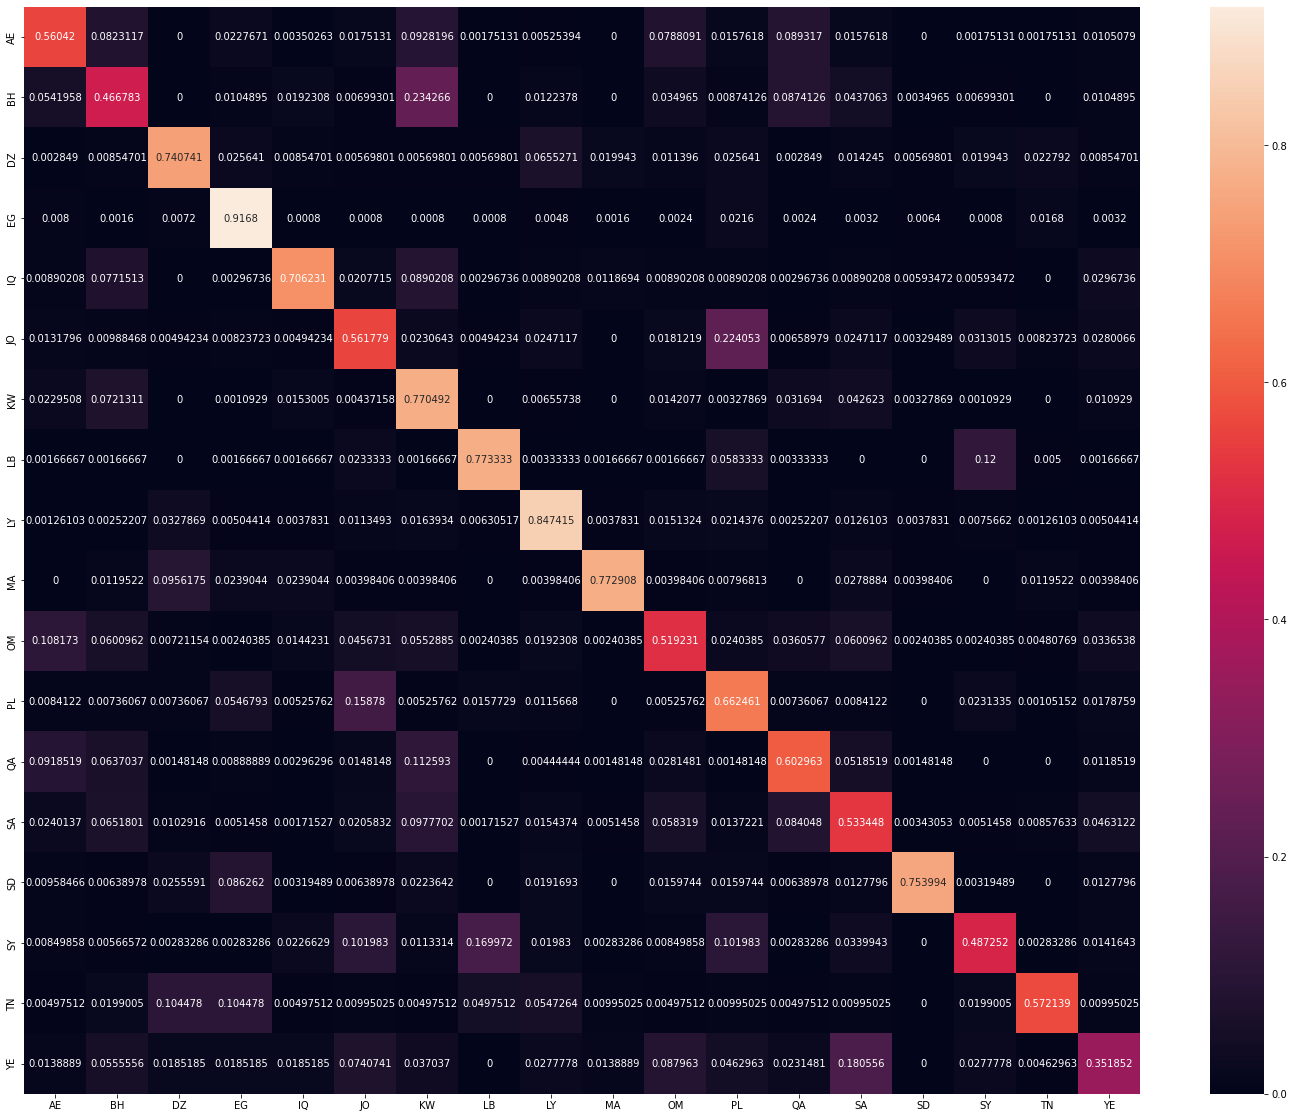

In [86]:
matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(25,20))

sns.heatmap(matrix,xticklabels=le.classes_,annot=True,fmt='g', yticklabels=le.classes_)

<AxesSubplot:ylabel='count'>

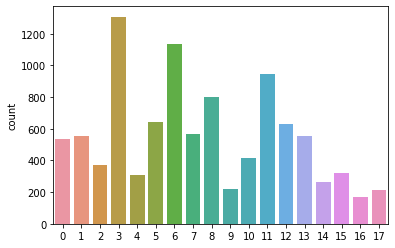

In [87]:
sns.countplot(preds)

<AxesSubplot:xlabel='dialect', ylabel='count'>

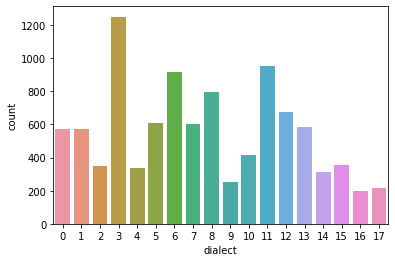

In [88]:
sns.countplot(ytest)